<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/One_Sided_Inversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Right sided and left sided inversion

## Example 1.10 from lecture notes (as of 2020)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

def h(t):
  if t == 1:
    return 1
  elif t == 2:
    return 1/2
  return 0

def g(t):
  if t >= -1:
    return (-1/2)**(t+1)
  return 0

t_values = np.arange(-10,10)

def plot_time():
  y_values = [h(t) for t in t_values]
  y2_values = [g(t) for t in t_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_title('filter')
  ax1.set_xlabel('$k$', fontsize=14)
  ax1.set_ylabel('$f[k]$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  ax1.stem(t_values, y_values);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_title('inverted filter')
  ax2.set_xlabel('$k$', fontsize=14)
  ax2.set_ylabel('$g[k]$', fontsize=14)
  ax2.axis(xmin=t_values[0], xmax=t_values[-1])
  ax2.stem(t_values, y2_values);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


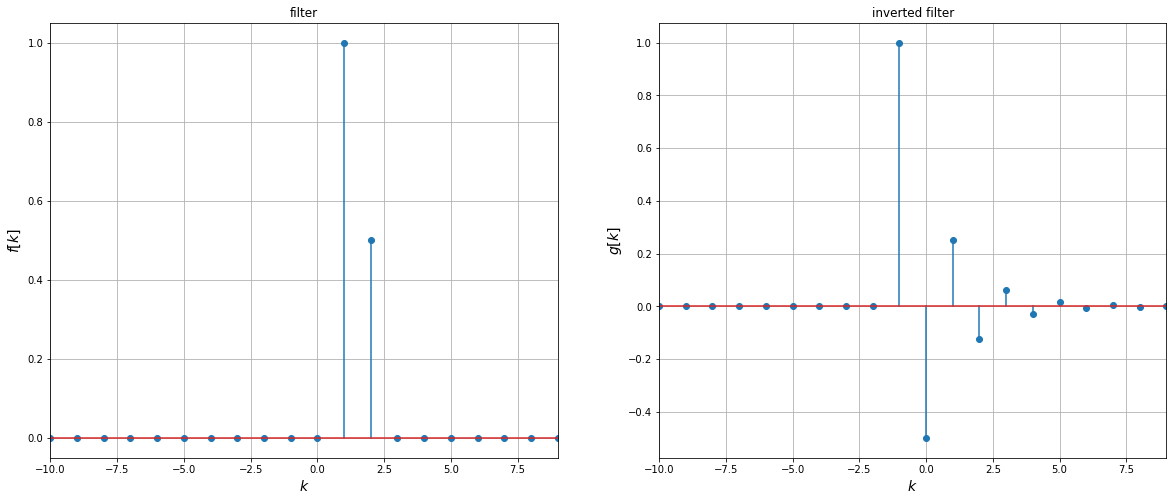

In [ ]:
plot_time()

# Example 1.11 (as of 2020)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

def h(k):
  if k == 1:
    return 1
  elif k == 2:
    return 2
  return 0

def g_r(k):
  if k >= -1:
    return (-1/2)**(-k)
  return 0

def g_l(k):
  if k < 0:
    return -(-1/2)**(-k)
  return 0

def g_l_delay_truncated(k):
  if k < 0:
    return 0
  return g_l(k-4)

k_values = np.arange(-10,10)

def plot_time2():
  y_values = [h(k) for k in k_values]
  y2_values = [g_r(k) for k in k_values]
  y3_values = [g_l(k) for k in k_values]
  y4_values = [g_l_delay_truncated(k) for k in k_values]

  fig = plt.figure(figsize=(20, 14))

  ax1 = fig.add_subplot(2, 2, 1)
  ax1.grid()
  ax1.set_title('signal')
  ax1.set_xlabel('$k$', fontsize=14)
  ax1.set_ylabel('$f[k]$', fontsize=14)
  ax1.axis(xmin=k_values[0], xmax=k_values[-1])
  ax1.stem(k_values, y_values);

  ax2 = fig.add_subplot(2, 2, 2)
  ax2.grid()
  ax2.set_title('right sided inversion')
  ax2.set_xlabel('$k$', fontsize=14)
  ax2.set_ylabel('$g_r[k]$', fontsize=14)
  ax2.axis(xmin=k_values[0], xmax=k_values[-1])
  ax2.stem(k_values, y2_values);

  ax3 = fig.add_subplot(2, 2, 3)
  ax3.grid()
  ax3.set_title('left sided inversion')
  ax3.set_xlabel('$k$', fontsize=14)
  ax3.set_ylabel('$g_l[k]$', fontsize=14)
  ax3.axis(xmin=k_values[0], xmax=k_values[-1])
  ax3.stem(k_values, y3_values);

  ax3 = fig.add_subplot(2, 2, 4)
  ax3.grid()
  ax3.set_title('truncated and causal left sided inversion')
  ax3.set_xlabel('$k$', fontsize=14)
  ax3.set_ylabel('$truncated\ delayed\ g_l[k]$', fontsize=14)
  ax3.axis(xmin=k_values[0], xmax=k_values[-1])
  ax3.stem(k_values, y4_values);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

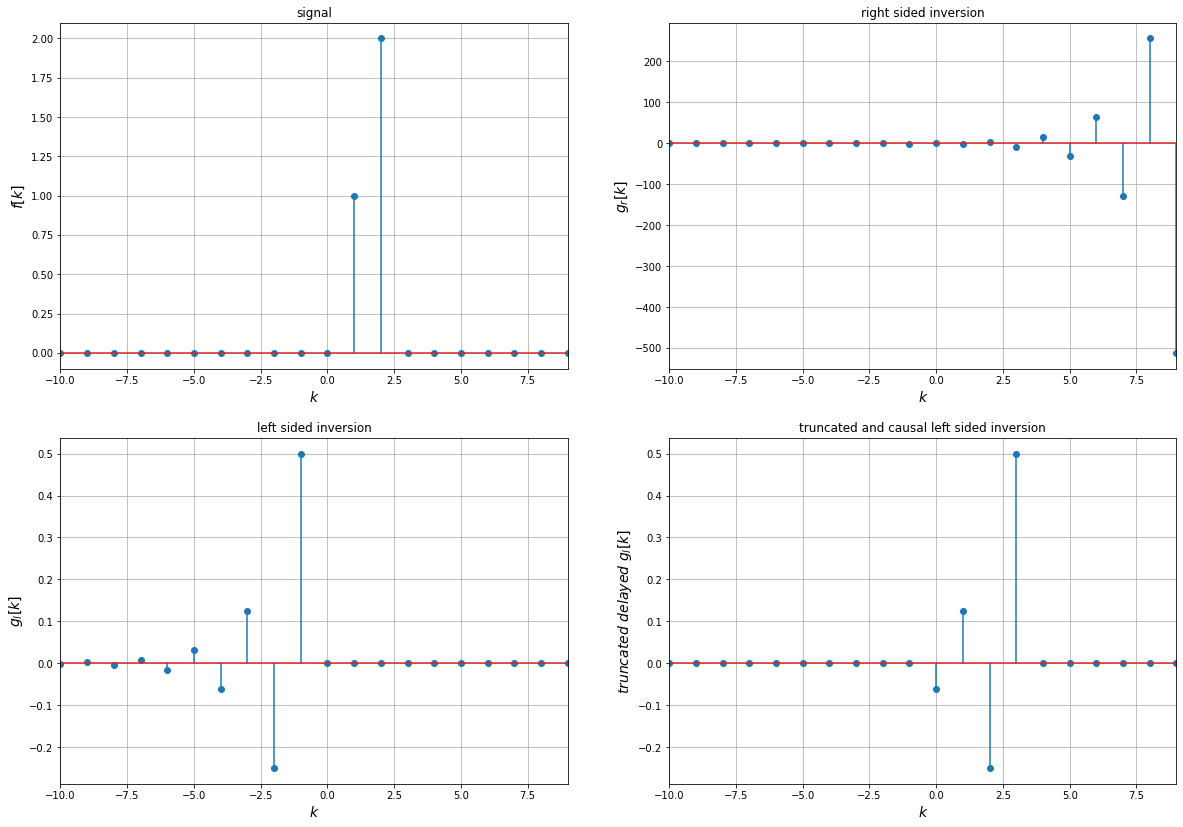

In [ ]:
plot_time2()